In [108]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt

Weather data from : http://www.bom.gov.au/climate/data/

In [109]:
maxTempdf = pd.read_csv('Weather\IDCJAC0010_086338_1800_Data.csv')

In [110]:
maxTempdf = maxTempdf[['Year','Month','Day','Maximum temperature (Degree C)']]
maxTempdf['Year'] = maxTempdf['Year'].astype(int)
maxTempdf['Month'] = maxTempdf['Month'].astype(int)
maxTempdf['Day'] = maxTempdf['Day'].astype(int)

In [111]:
maxTempdf = maxTempdf.loc[maxTempdf['Year'] >= 2017] 
maxTempdf['Maximum temperature (Degree C)'] = maxTempdf['Maximum temperature (Degree C)'].astype(float)
maxTempdf = maxTempdf.rename(columns={"Maximum temperature (Degree C)": "MaxTemp"})

In [112]:
maxTempdf.head()

,Year,Month,Day,MaxTemp
1461,2017,1,1,21.1
1462,2017,1,2,17.8
1463,2017,1,3,19.5
1464,2017,1,4,29.3
1465,2017,1,5,31.7


In [113]:
solardf = pd.read_csv('Weather\IDCJAC0016_086338_1800_Data.csv')

In [114]:
solardf = solardf[['Year','Month','Day','Daily global solar exposure (MJ/m*m)']]

In [115]:
solardf['Year'] = solardf['Year'].astype(int)
solardf['Month'] = solardf['Month'].astype(int)
solardf['Day'] = solardf['Day'].astype(int)
solardf = solardf.loc[solardf['Year'] >= 2017]
solardf = solardf.rename(columns={"Daily global solar exposure (MJ/m*m)": "SolarExp"})
solardf['SolarExp'] = pd.to_numeric(solardf['SolarExp'],errors='coerce')
solardf.head()

,Year,Month,Day,SolarExp
9862,2017,1,1,8.5
9863,2017,1,2,7.8
9864,2017,1,3,25.9
9865,2017,1,4,31.6
9866,2017,1,5,29.7


In [116]:
minTempdf = pd.read_csv('Weather\IDCJAC0011_086338_1800_Data.csv')
minTempdf = minTempdf[['Year','Month','Day','Minimum temperature (Degree C)']]
minTempdf['Year'] = minTempdf['Year'].astype(int)
minTempdf['Month'] = minTempdf['Month'].astype(int)
minTempdf['Day'] = minTempdf['Day'].astype(int)
minTempdf = minTempdf.loc[minTempdf['Year'] >= 2017] 
minTempdf['Minimum temperature (Degree C)'] = minTempdf['Minimum temperature (Degree C)'].astype(float)
minTempdf = minTempdf.rename(columns={"Minimum temperature (Degree C)": "MinTemp"})
minTempdf.head()

,Year,Month,Day,MinTemp
1461,2017,1,1,16.8
1462,2017,1,2,14.8
1463,2017,1,3,14.6
1464,2017,1,4,13.3
1465,2017,1,5,18.5


In [117]:
weather_df = maxTempdf.merge(solardf, how='inner', left_on=["Year", "Month", "Day"], right_on=["Year", "Month", "Day"])
weather_df = weather_df.merge(minTempdf, how='inner', left_on=["Year", "Month", "Day"], right_on=["Year", "Month", "Day"])

In [118]:
weather_df['Date'] = pd.to_datetime(weather_df[['Year', 'Month', 'Day']])
weather_df = weather_df[['Date','MinTemp','MaxTemp','SolarExp']]
weather_df = weather_df.loc[weather_df['Date'] < '2020-10-01'] 
weather_df.tail()

,Date,MinTemp,MaxTemp,SolarExp
1364,2020-09-26,6.2,13.4,15.0
1365,2020-09-27,8.8,13.4,20.9
1366,2020-09-28,6.5,13.6,18.3
1367,2020-09-29,4.3,21.0,18.4
1368,2020-09-30,10.7,19.4,13.0


Population of Victoria from https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release#data-download


In [119]:
population_df = pd.DataFrame(columns={'Date','Population'})

In [120]:
population_df['Date'] = pd.date_range('2017-01-01', '2020-09-30', freq='D')

In [121]:
population_df.loc[population_df.Date < "2017-03-01", "Population"] = 6244863
population_df.loc[((population_df.Date >= "2017-03-01") & (population_df.Date < "2017-06-01")), "Population"] = 6292584
population_df.loc[((population_df.Date >= "2017-06-01") & (population_df.Date < "2017-09-01")), "Population"] = 6321606
population_df.loc[((population_df.Date >= "2017-09-01") & (population_df.Date < "2017-12-01")), "Population"] = 6357405
population_df.loc[((population_df.Date >= "2017-12-01") & (population_df.Date < "2018-03-01")), "Population"] = 6387081
population_df.loc[((population_df.Date >= "2018-03-01") & (population_df.Date < "2018-06-01")), "Population"] = 6432655
population_df.loc[((population_df.Date >= "2018-06-01") & (population_df.Date < "2018-09-01")), "Population"] = 6462019
population_df.loc[((population_df.Date >= "2018-09-01") & (population_df.Date < "2018-12-01")), "Population"] = 6498887
population_df.loc[((population_df.Date >= "2018-12-01") & (population_df.Date < "2019-03-01")), "Population"] = 6528601
population_df.loc[((population_df.Date >= "2019-03-01") & (population_df.Date < "2019-06-01")), "Population"] = 6572839
population_df.loc[((population_df.Date >= "2019-06-01") & (population_df.Date < "2019-09-01")), "Population"] = 6596467
population_df.loc[((population_df.Date >= "2019-09-01") & (population_df.Date < "2019-12-01")), "Population"] = 6630739
population_df.loc[((population_df.Date >= "2019-12-01") & (population_df.Date < "2020-03-01")), "Population"] = 6655284
population_df.loc[population_df.Date >= "2020-03-01", "Population"] = 6689377

In [122]:
population_df

,Date,Population
0,2017-01-01,6244863
1,2017-01-02,6244863
2,2017-01-03,6244863
3,2017-01-04,6244863
4,2017-01-05,6244863
...,...,...
1364,2020-09-26,6689377
1365,2020-09-27,6689377
1366,2020-09-28,6689377
1367,2020-09-29,6689377


In [123]:
reference_df = population_df.merge(weather_df, how='inner', left_on=["Date"], right_on=["Date"])
reference_df.head()

,Date,Population,MinTemp,MaxTemp,SolarExp
0,2017-01-01,6244863,16.8,21.1,8.5
1,2017-01-02,6244863,14.8,17.8,7.8
2,2017-01-03,6244863,14.6,19.5,25.9
3,2017-01-04,6244863,13.3,29.3,31.6
4,2017-01-05,6244863,18.5,31.7,29.7


In [124]:
reference_df['wk_end'] = np.where(((reference_df['Date']).dt.dayofweek) < 5,0,1)

In [125]:
reference_df.tail(20)

,Date,Population,MinTemp,MaxTemp,SolarExp,wk_end
1349,2020-09-11,6689377,10.4,19.4,13.4,0
1350,2020-09-12,6689377,13.3,16.0,4.0,1
1351,2020-09-13,6689377,11.9,17.2,16.5,1
1352,2020-09-14,6689377,11.1,16.6,18.1,0
1353,2020-09-15,6689377,7.4,15.8,18.3,0
1354,2020-09-16,6689377,7.1,22.8,17.4,0
1355,2020-09-17,6689377,11.8,15.5,9.4,0
1356,2020-09-18,6689377,8.4,18.7,13.6,0
1357,2020-09-19,6689377,11.3,26.3,17.1,1
1358,2020-09-20,6689377,17.1,22.0,16.7,1


Public Holidays Source : https://data.gov.au/data/dataset/australian-holidays-machine-readable-dataset

In [126]:
holidays_2017_2018 = pd.read_csv('Holidays/australianpublicholidays-201718.csv')

In [127]:
holidays_2017_2018 = holidays_2017_2018.loc[ (holidays_2017_2018['Applicable To'].str.contains('NAT')) | (holidays_2017_2018['Applicable To'].str.contains('VIC')) ] 
holidays_2017_2018 = holidays_2017_2018[['Date','Applicable To']]
holidays_2017_2018 = holidays_2017_2018.rename(columns={"Applicable To": "Jurisdiction"})

In [128]:
holidays_2019 = pd.read_csv('Holidays/australian_public_holidays_2019.csv')
holidays_2020 = pd.read_csv('Holidays/australian_public_holidays_2020.csv')

In [129]:
holidays_2019 = holidays_2019.loc[ holidays_2019['Jurisdiction'].str.contains('vic') ] 
holidays_2019 = holidays_2019[['Date','Jurisdiction']]
holidays_2020 = holidays_2020.loc[ holidays_2020['Jurisdiction'].str.contains('vic') ] 
holidays_2020 = holidays_2020[['Date','Jurisdiction']]


In [130]:
holidays = holidays_2017_2018.append(holidays_2019).append(holidays_2020)

In [131]:
holidays['Jurisdiction'] = 1

In [132]:
holidays['Date']= pd.to_datetime(holidays['Date'], format='%Y%m%d')
holidays.dtypes

Date            datetime64[ns]
Jurisdiction             int64
dtype: object

In [133]:
reference_df = reference_df.merge(holidays, how='left', left_on=["Date"], right_on=["Date"])

In [152]:
reference_df = reference_df.rename(columns={"Jurisdiction": "public_holiday"})
# reference_df.loc[reference_df.public_holiday == 'NAN ] = 0
reference_df['public_holiday'] = reference_df['public_holiday'].fillna(0)
reference_df["public_holiday"] = reference_df["public_holiday"].astype(int)
reference_df.tail()

,Date,Population,MinTemp,MaxTemp,SolarExp,wk_end,public_holiday,covid
1364,2020-09-26,6689377,6.2,13.4,15.0,1,0,1
1365,2020-09-27,6689377,8.8,13.4,20.9,1,0,1
1366,2020-09-28,6689377,6.5,13.6,18.3,0,0,1
1367,2020-09-29,6689377,4.3,21.0,18.4,0,0,1
1368,2020-09-30,6689377,10.7,19.4,13.0,0,0,1


In [135]:
reference_df['covid'] = pd.Series(dtype='int')
reference_df.loc[reference_df.Date < "2020-03-22", "covid"] = 0
reference_df.loc[reference_df.Date >= "2020-03-22", "covid"] = 1
reference_df["covid"] = reference_df["covid"].astype(int)

Electricity Demand from https://aemo.com.au/en/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

In [136]:
path = r'C:\Users\amilk\Google Drive\Data Analytics\Assignments\Final\Data\Elec_Demand'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
demand_df   = pd.concat(df_from_each_file, ignore_index=True)
demand_df.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2017/01/01 00:30:00,4097.58,15.94,TRADE
1,VIC1,2017/01/01 01:00:00,4034.74,20.16,TRADE
2,VIC1,2017/01/01 01:30:00,3851.70,20.78,TRADE
3,VIC1,2017/01/01 02:00:00,3649.99,22.23,TRADE
4,VIC1,2017/01/01 02:30:00,3517.65,24.23,TRADE


In [137]:
demand_df = demand_df[['SETTLEMENTDATE','TOTALDEMAND']]
demand_df["Date"] = demand_df.SETTLEMENTDATE.str[:10]
demand_df = demand_df[['Date','TOTALDEMAND']]
demand_df = demand_df.groupby(by="Date").sum().reset_index()


In [138]:
demand_df["Date"] = pd.to_datetime(demand_df["Date"])

In [139]:
demand_df = demand_df.merge(reference_df, how='inner', left_on=["Date"], right_on=["Date"])

In [140]:
demand_df['year'] =  pd.DatetimeIndex(demand_df['Date']).year
demand_df['month'] =  pd.DatetimeIndex(demand_df['Date']).month
demand_df['day'] =  pd.DatetimeIndex(demand_df['Date']).day
demand_df['Demand_GWh'] = demand_df['TOTALDEMAND']/1000

In [141]:
demand_df.dropna()
demand_df.to_csv('demand.csv', index = False)

In [142]:
demand_df.head(5)

,Date,TOTALDEMAND,Population,MinTemp,MaxTemp,SolarExp,wk_end,public_holiday,covid,year,month,day,Demand_GWh
0,2017-01-01,174464.51,6244863,16.8,21.1,8.5,1,1,0,2017,1,1,174.46451
1,2017-01-02,173014.94,6244863,14.8,17.8,7.8,0,1,0,2017,1,2,173.01494
2,2017-01-03,195129.49,6244863,14.6,19.5,25.9,0,0,0,2017,1,3,195.12949
3,2017-01-04,233213.59,6244863,13.3,29.3,31.6,0,0,0,2017,1,4,233.21359
4,2017-01-05,256159.69,6244863,18.5,31.7,29.7,0,0,0,2017,1,5,256.15969


In [143]:
demand_df.Demand_GWh.max()

341.3076800000001

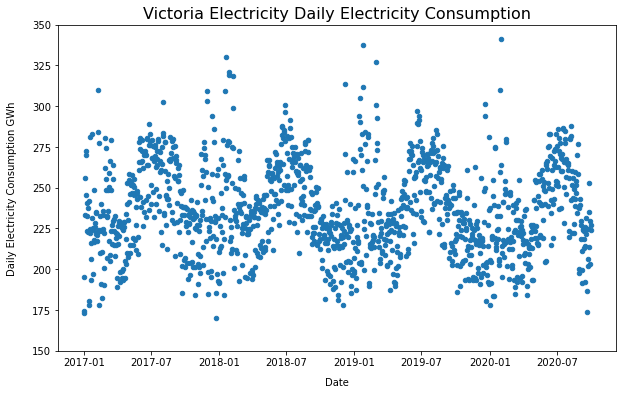

In [151]:
# ax = demand_df.plot.bar(x='Date', y='TOTALDEMAND', rot=0)
ax2 = demand_df.plot.scatter(figsize=(10, 6), x='Date', y='Demand_GWh',ylim=(150,350))
plt.xlabel("Date", labelpad=10)
plt.ylabel("Daily Electricity Consumption GWh", labelpad=15)
plt.title("Victoria Electricity Daily Electricity Consumption", fontsize=16);
plt.show()